# EDA Notebook

In this notebook I imported the diabetes dataset for the first time to analyze it and clean it so it can be ready to build a machine learning model around it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

## Step 1 Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Features I didn't know what their values mean so I wrote a brief explanation about them here:
1. **Glucose**

    Description: This measures the concentration of glucose in the blood. It's an essential indicator for diagnosing diabetes, as it reflects the body's ability to regulate blood sugar levels.
    
    Normal Range: A fasting blood glucose level is considered normal if it's between 70 and 99 mg/dL. Levels between 100 and 125 mg/dL indicate prediabetes, while levels above 126 mg/dL indicate diabetes.

2. **Blood Pressure**

    Description: This typically refers to diastolic blood pressure (the lower number in a blood pressure reading), indicating the pressure in the arteries when the heart rests between beats.
    
    Normal Range: Normal blood pressure is typically around 120/80 mmHg. A diastolic pressure below 80 mmHg is considered normal. Prehypertension is defined as 80-89 mmHg, and hypertension is 90 mmHg or higher.

3. **Skin Thickness**

    Description: Also referred to as triceps skinfold thickness, this measures the thickness of the subcutaneous fat layer in the triceps area. It's an indicator of body fat.
    
    Normal Range: There is no strict "normal" range, as it can vary widely depending on factors like age, gender, and overall body composition. However, typical values range from about 10 to 50 mm.

4. **Insulin**

    Description: This measures the level of insulin in the blood. Insulin is a hormone that helps regulate blood glucose levels by facilitating the uptake of glucose into cells.
    
    Normal Range: Normal fasting insulin levels are usually between 2.6 and 24.9 µIU/mL. Levels can vary based on factors like body mass and age.

5. **BMI (Body Mass Index)**

    Description: BMI is a measure of body fat based on height and weight. It's used to categorize individuals as underweight, normal weight, overweight, or obese.
    
    Normal Range: A BMI between 18.5 and 24.9 is considered normal weight. Below 18.5 is underweight, 25-29.9 is overweight, and 30 or above is obese.

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checks for the distribution of the labels
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
# Checks for duplicates
duplicates = df.duplicated().value_counts()
duplicates

False    768
Name: count, dtype: int64

#### Data inspection questions
- **How many (non-null) observations do we have?**
 
    RE: 768 entries

- **How many unique columns/features are present?**

    RE: We have 8 feature columns and 1 target value column

- **Which columns, if any, contain missing data?**

    RE: We don't have null values, but there are some hidden missing values

- **What is the data type of each column?**

    RE: There are in64 and float64, there is no need to modify the data types

- **Are there any values that seem unusual or are potential outliers?**
    
    RE: Yes

- **Are there any duplicated values?**

    RE: No, we don't have duplicated values

- **Is the dataset balanced?**

    RE: No, it has class imbalance 

#### Check for hidden missing values from the summary statistics
- **Pregnancies:** All good.
- **Glucose:** Check values lower than the 1st quartile to see how many values are 0 and therefore missing.
- **BloodPressure:** Check values lower than the 1st quartile to see how many values are 0 and therefore missing.
- **SkinThickness:** From the 1st quatile and below we have values of 0 so we have various missing values.  
- **Insulin:** From the 1st quatile and below we have values of 0 so we have various missing values.                   
- **BMI:** Check values lower than the 1st quartile to see how many values are 0 and therefore missing.               
- **DiabetesPedigreeFunction:** All good.
- **Age:** All good.
- **Outcome:** All good.           

In [9]:
gluc_missing_df = df[df.Glucose < 99].sort_values(by='Glucose')
gluc_missing_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32,0,41.0,0.346,37,1
342,1,0,68,35,0,32.0,0.389,22,0
182,1,0,74,20,23,27.7,0.299,21,0
502,6,0,68,41,0,39.0,0.727,41,1
75,1,0,48,20,0,24.7,0.140,22,0
62,5,44,62,0,0,25.0,0.587,36,0
680,2,56,56,28,45,24.2,0.332,22,0
537,0,57,60,0,0,21.7,0.735,67,0
146,9,57,80,37,0,32.8,0.096,41,0
352,3,61,82,28,0,34.4,0.243,46,0


In [10]:
bloodpress_missing_df = df[df.BloodPressure < 62].sort_values(by='BloodPressure')
bloodpress_missing_df.head(40)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
261,3,141,0,0,0,30.0,0.761,27,1
604,4,183,0,0,0,28.4,0.212,36,1
357,13,129,0,30,0,39.9,0.569,44,1
347,3,116,0,0,0,23.5,0.187,23,0
336,0,117,0,0,0,33.8,0.932,44,0
619,0,119,0,0,0,32.4,0.141,24,1
332,1,180,0,0,0,43.3,0.282,41,1
706,10,115,0,0,0,0.0,0.261,30,1
703,2,129,0,0,0,38.5,0.304,41,0
643,4,90,0,0,0,28.0,0.610,31,0


In [11]:
bmi_missing_df = df[df.BMI < 23.3].sort_values(by='BMI')
bmi_missing_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
706,10,115,0,0,0,0.0,0.261,30,1
684,5,136,82,0,0,0.0,0.640,69,0
522,6,114,0,0,0,0.0,0.189,26,0
494,3,80,0,0,0,0.0,0.174,22,0
426,0,94,0,0,0,0.0,0.256,25,0
145,0,102,75,23,0,0.0,0.572,21,0
81,2,74,0,0,0,0.0,0.102,22,0
371,0,118,64,23,89,0.0,1.731,21,0
60,2,84,0,0,0,0.0,0.304,21,0


In [12]:
## Change the 0 values to np.nan to perform imputation
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

# Count the missing values
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### 1.1 Impute missing data

Create two new dataframes: 
- clean_df_one: elimination all missing values
- clean_df_two: imputation of all the missing values.

In [13]:
# Preparing clean_df_one

clean_df_one = df.dropna().reset_index().drop(columns=['index'])
clean_df_one.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 27.7 KB


In [14]:
clean_df_one.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [15]:
clean_df_one.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


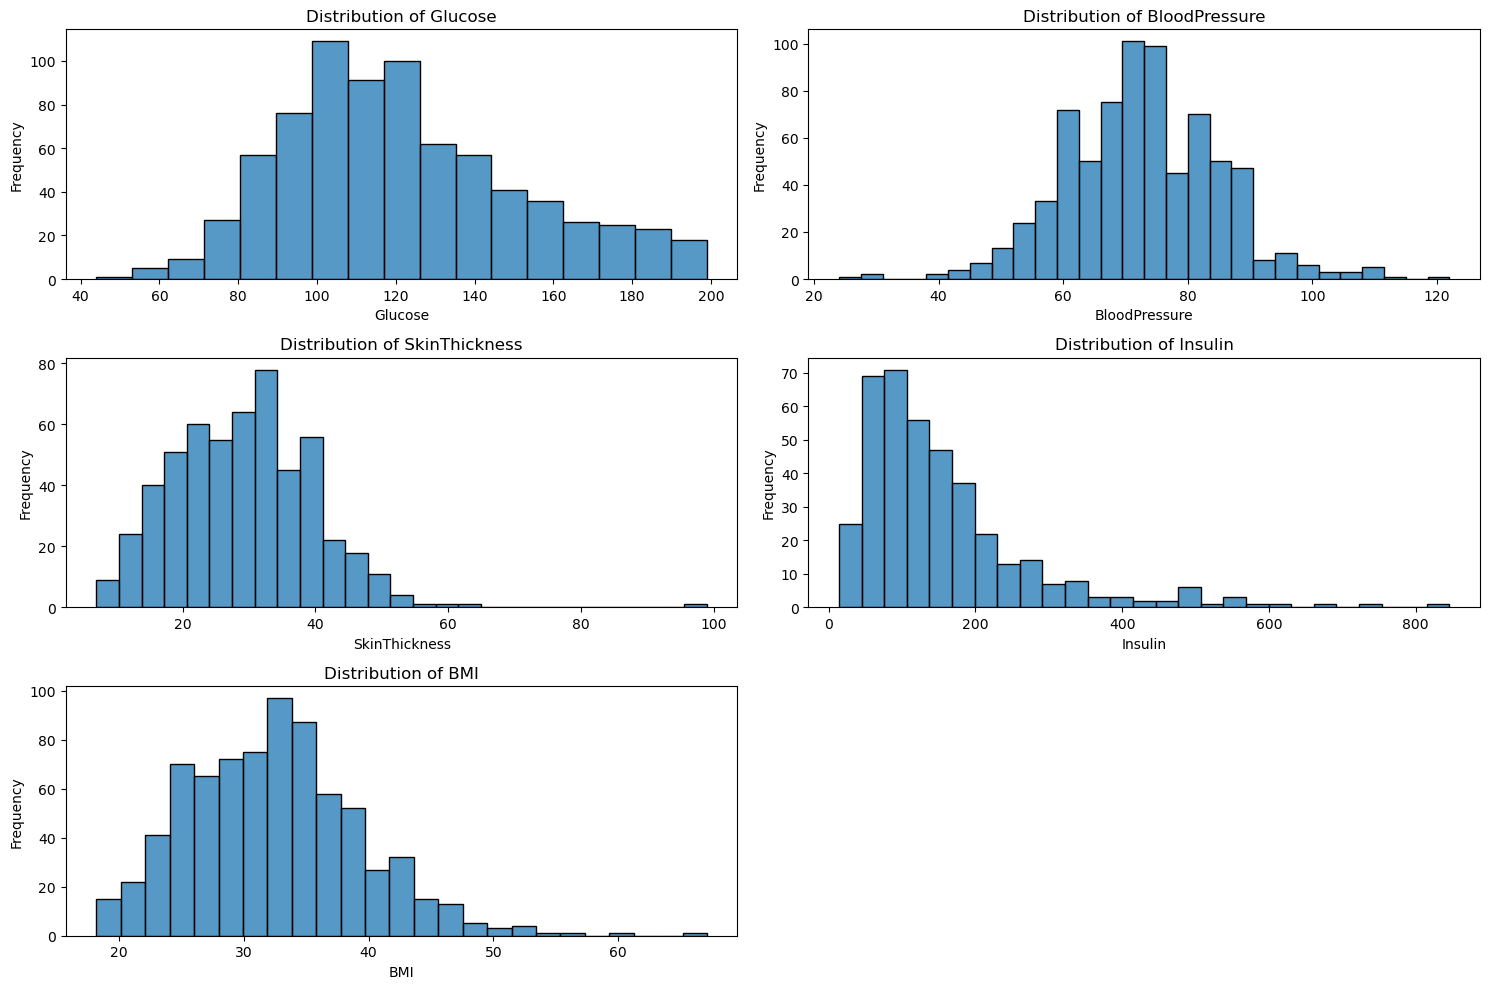

In [16]:
# Create clean_df_two
clean_df_two = df

# Create plots to check distributions to see what kind of normalization I will use
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(columns_to_impute):
    sns.histplot(clean_df_two[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove the empty subplot (if any)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
# Data Normalization
scaler = RobustScaler()
scaled_data = scaler.fit_transform(clean_df_two[columns_to_impute])

# Data Imputation using KNN
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)
clean_df_two[columns_to_impute] = scaler.inverse_transform(imputed_data)

# Check null values
clean_df_two.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
clean_df_two.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.706510,72.440885,28.626042,150.436198,32.450469,0.471876,33.240885,0.348958
std,3.369578,30.445419,12.217735,9.573467,96.716445,6.890104,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,87.300000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.200000,127.800000,32.150000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,187.550000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1.2 Dealing with outliers

In [19]:
df_column_names = list(df.columns)
column_names_for_box_plots = df_column_names.copy()
column_names_for_box_plots.pop(-1)

print(df_column_names)
print(column_names_for_box_plots)


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


#### 1.2.1 clean_df_one

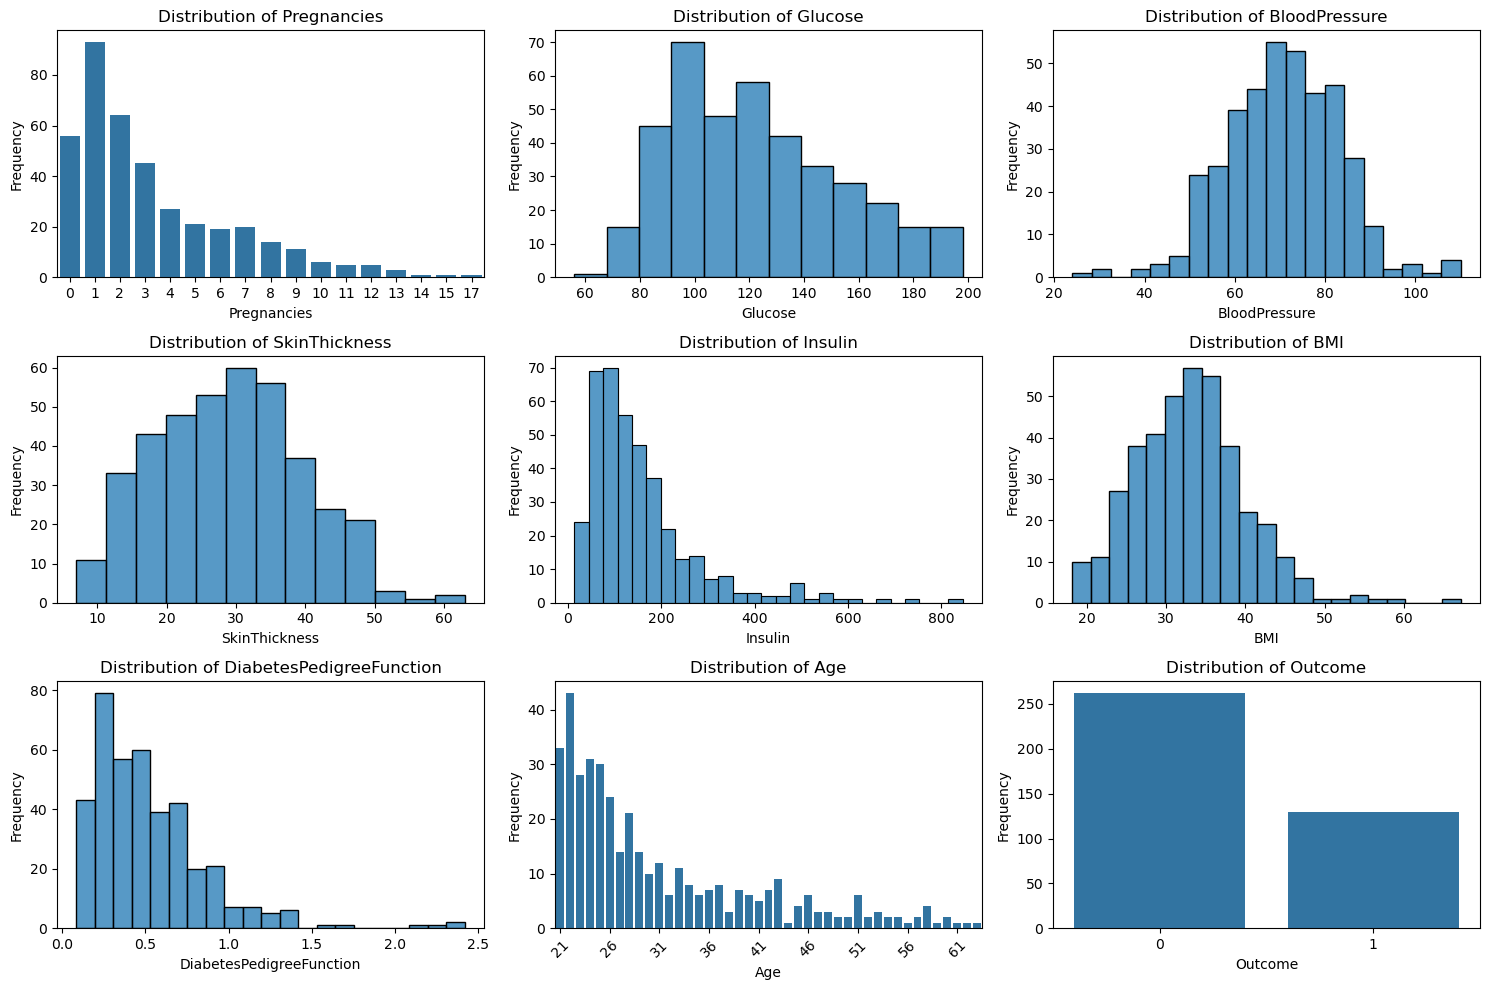

In [20]:
def plot_distributions(df_column_names, df):
    
    # Creating plots to check distributions in the dataset
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each column
    for i, col in enumerate(df_column_names):
        if col == 'Age':  # Use bar plot for discrete variables
            sns.countplot(x=df[col], ax=axes[i])
            axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure ticks are integers
            axes[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Adjust tick frequency
            axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed
        elif col in ['Pregnancies', 'Outcome']:
            sns.countplot(x=df[col], ax=axes[i])
        else:  # Use histogram for continuous variables
            sns.histplot(df[col], kde=False, ax=axes[i])
        
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')


    # Remove the empty subplot (if any)
    if len(df_column_names) < len(axes):
        fig.delaxes(axes[-1])

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_distributions(df_column_names, clean_df_one)


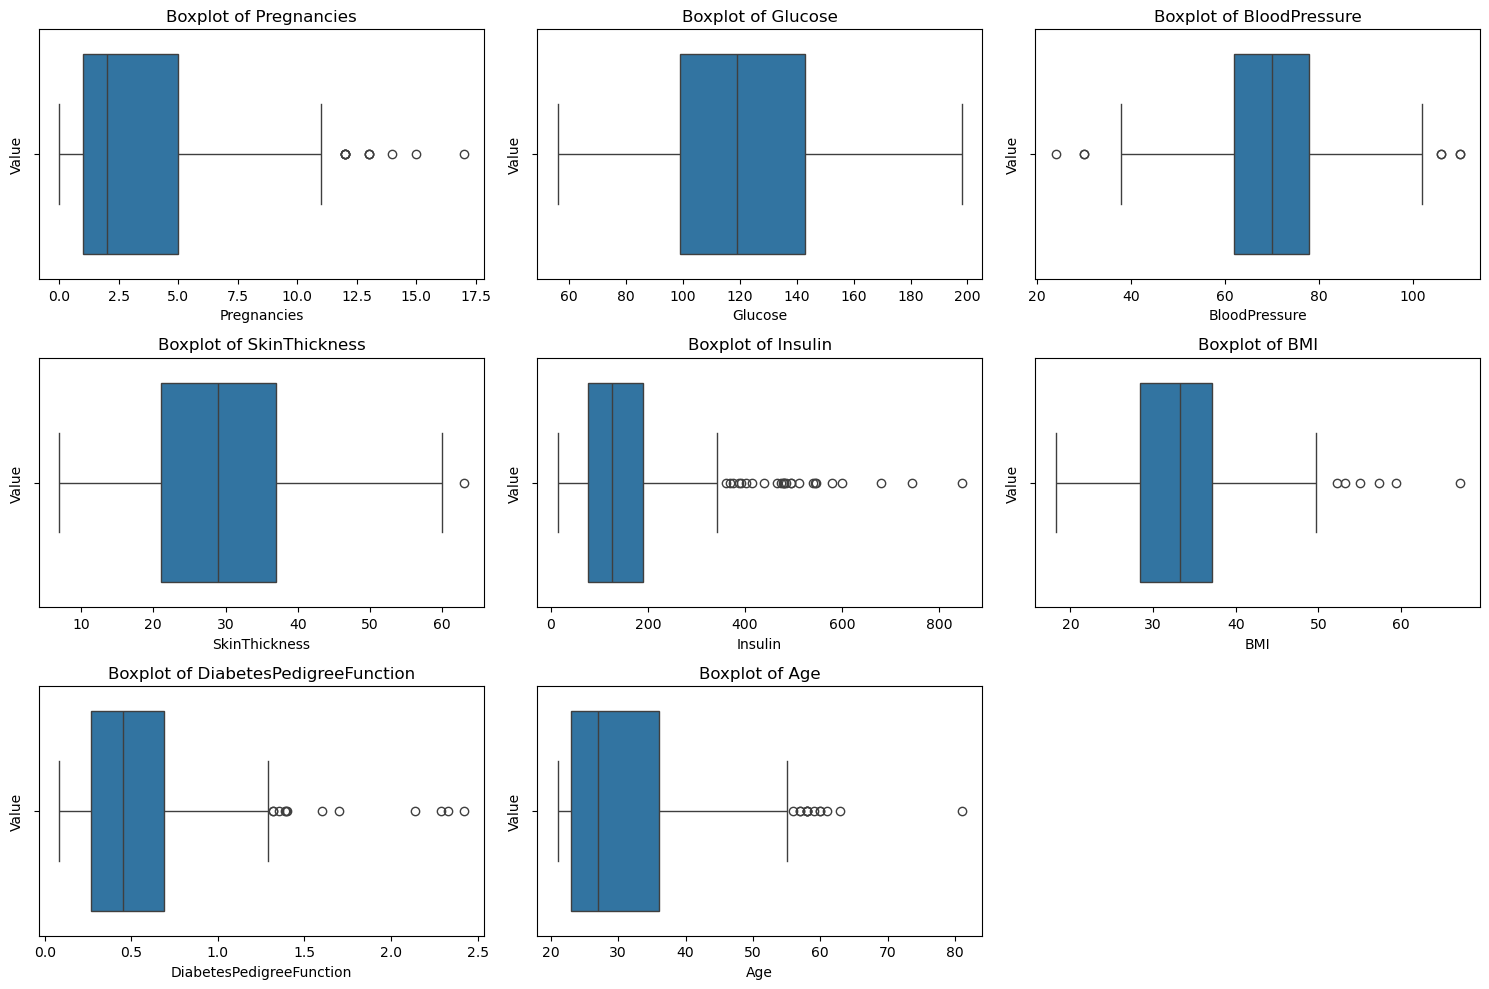

In [21]:
def plot_boxplots(df_column_names, df):
    # Create boxplots to identify outliers
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each boxplot
    for i, col in enumerate(df_column_names):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Value')

    # Remove the empty subplot (if any)
    if len(df_column_names) < len(axes):
        fig.delaxes(axes[-1])

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_boxplots(column_names_for_box_plots, clean_df_one)

In [22]:
# Check how many high insuline records have diabetes
high_insuline_df = clean_df_one[clean_df_one.Insulin > 350].sort_values(by=['Insulin'], ascending=False)
high_insuline_df['Outcome'].value_counts()

Outcome
1    15
0    10
Name: count, dtype: int64

In [23]:
# Eliminate the records that are considered outliers
def eliminate_outliers(feature_name, df):
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[feature_name] >= lower_bound) & (df[feature_name] <= upper_bound)]
    return df_cleaned

for col in column_names_for_box_plots:
    clean_df_one = eliminate_outliers(col, clean_df_one)

clean_df_one = clean_df_one.reset_index()
clean_df_one.drop(columns=['index'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
2,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
3,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
4,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...
316,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
317,1,121.0,78.0,39.0,74.0,39.0,0.261,28,0
318,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
319,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0


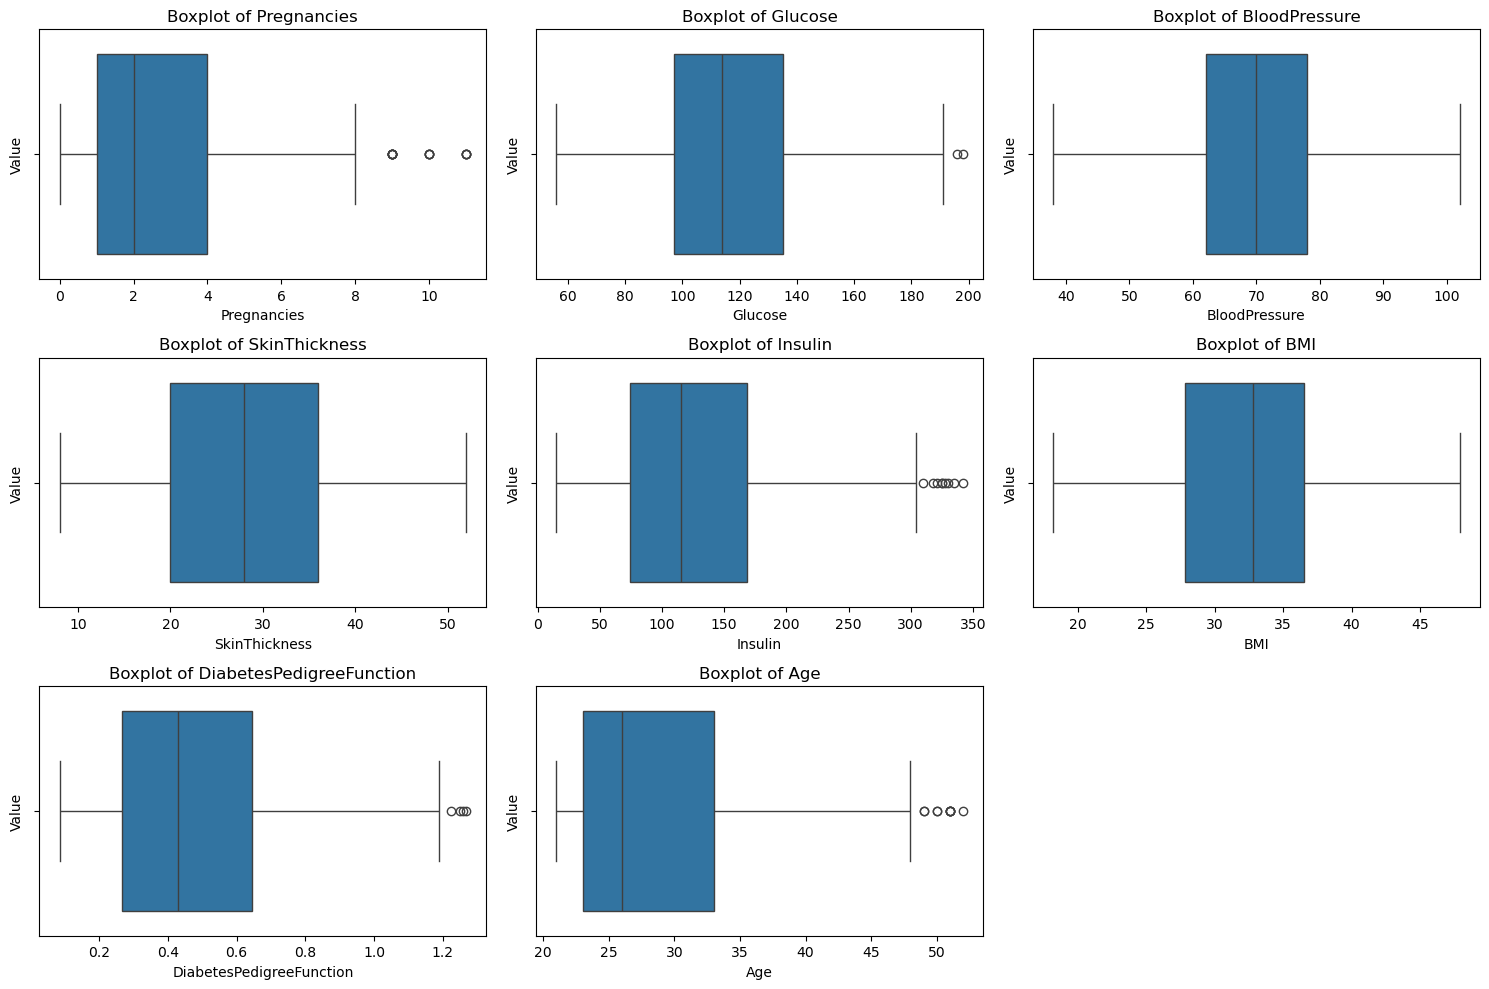

In [24]:
# Create boxplots to review outlier elimination
plot_boxplots(column_names_for_box_plots, clean_df_one)


In [25]:
clean_df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     321 non-null    int64  
 1   Pregnancies               321 non-null    int64  
 2   Glucose                   321 non-null    float64
 3   BloodPressure             321 non-null    float64
 4   SkinThickness             321 non-null    float64
 5   Insulin                   321 non-null    float64
 6   BMI                       321 non-null    float64
 7   DiabetesPedigreeFunction  321 non-null    float64
 8   Age                       321 non-null    int64  
 9   Outcome                   321 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 25.2 KB


In [26]:
clean_df_one.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,199.741433,2.841121,118.199377,69.968847,28.177570,128.087227,32.309034,0.476115,28.859813,0.271028
std,111.656246,2.602221,28.630689,11.061149,10.112937,70.754760,6.238636,0.260074,7.742071,0.445185
min,0.000000,0.000000,56.000000,38.000000,8.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,102.000000,1.000000,97.000000,62.000000,20.000000,74.000000,27.800000,0.267000,23.000000,0.000000
50%,204.000000,2.000000,114.000000,70.000000,28.000000,115.000000,32.800000,0.430000,26.000000,0.000000
75%,294.000000,4.000000,135.000000,78.000000,36.000000,168.000000,36.500000,0.646000,33.000000,1.000000
max,391.000000,11.000000,198.000000,102.000000,52.000000,342.000000,47.900000,1.268000,52.000000,1.000000


In [27]:
clean_df_one.to_csv('dataset/diabetes_v1.csv', index=False)

#### 1.2.2 clean_df_two

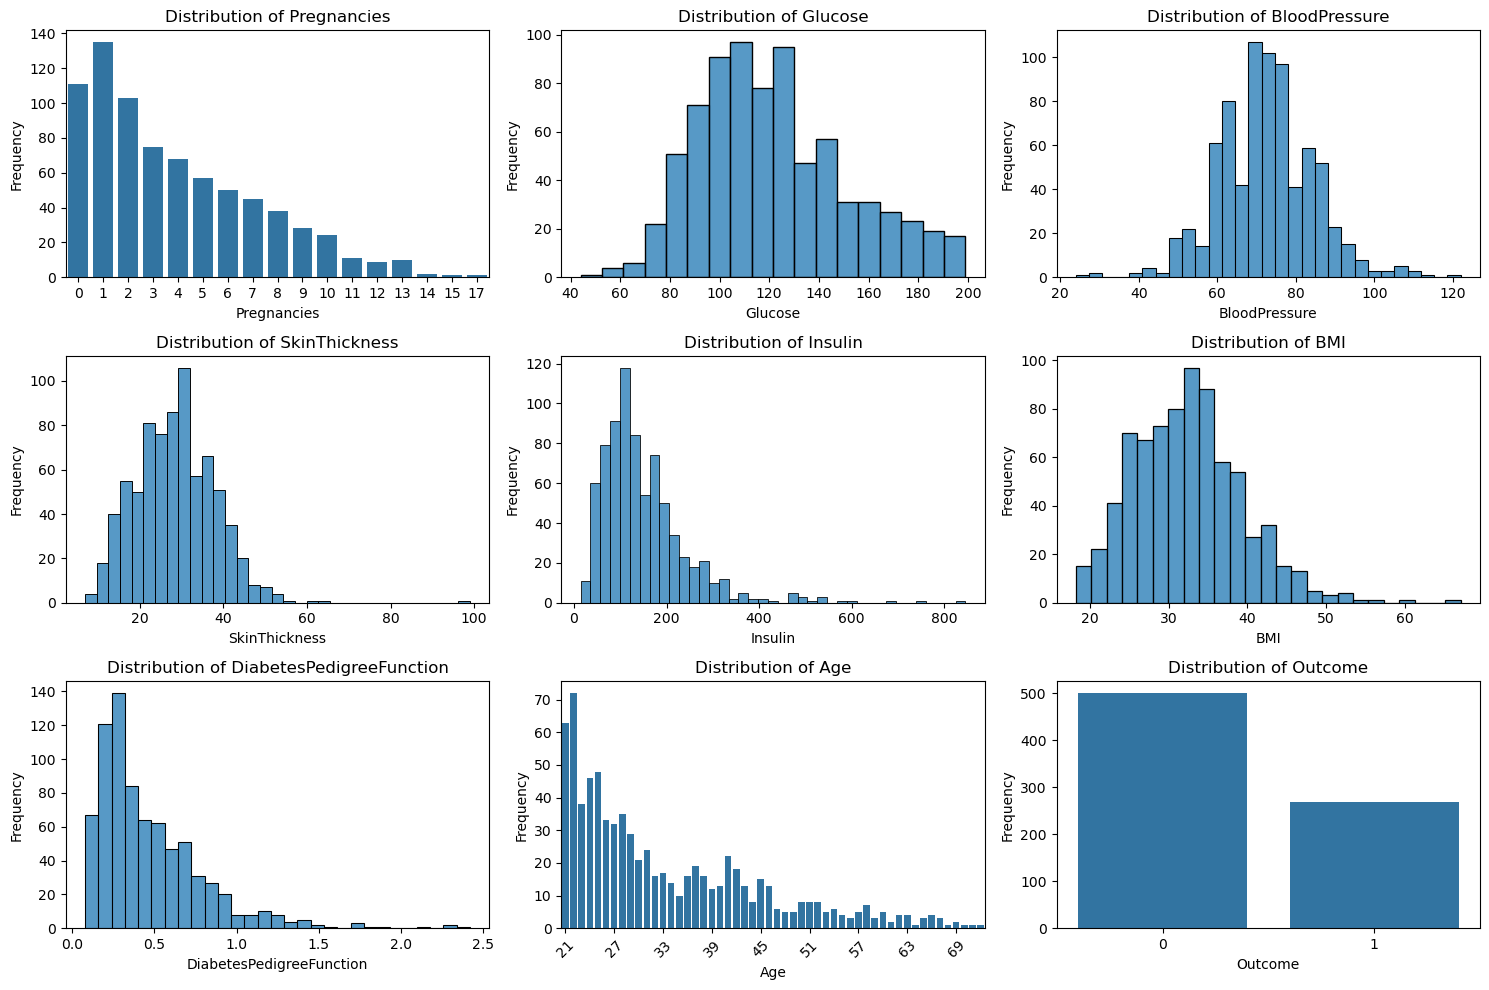

In [28]:
plot_distributions(df_column_names, clean_df_two)

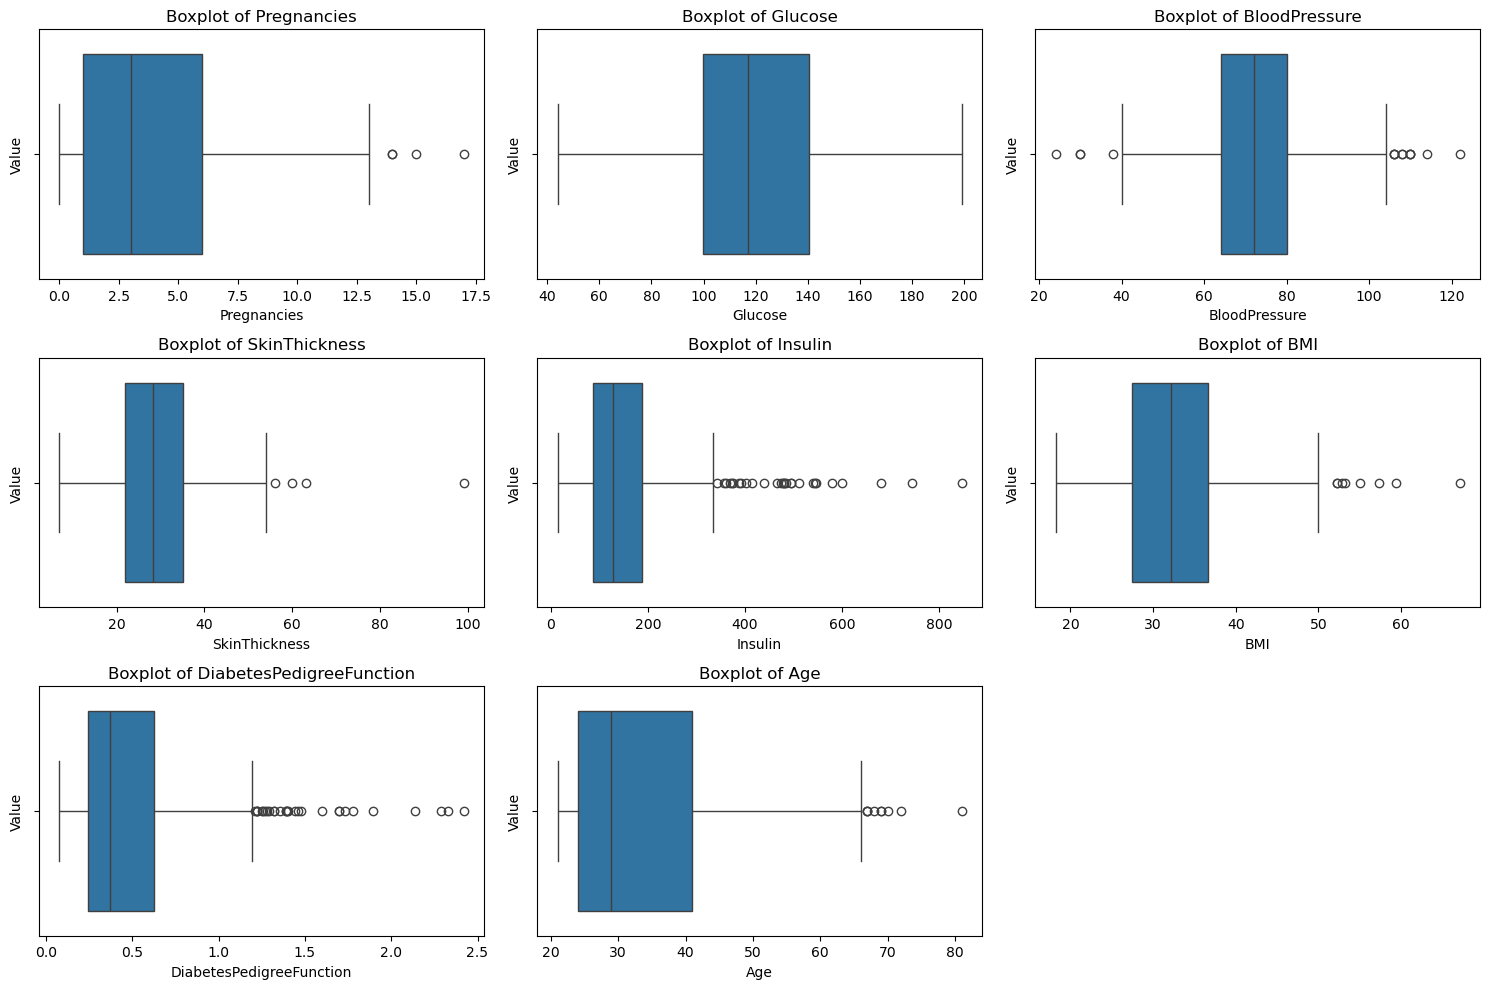

In [29]:
plot_boxplots(column_names_for_box_plots, clean_df_two)

In [30]:
for col in column_names_for_box_plots:
    clean_df_two = eliminate_outliers(col, clean_df_two)

clean_df_two = clean_df_two.reset_index()
clean_df_two.drop(columns=['index'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,196.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,73.6,26.6,0.351,31,0
2,8,183.0,64.0,25.6,218.2,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,116.0,74.0,24.2,85.0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
660,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
661,2,122.0,70.0,27.0,142.6,36.8,0.340,27,0
662,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
663,1,126.0,60.0,21.2,186.8,30.1,0.349,47,1


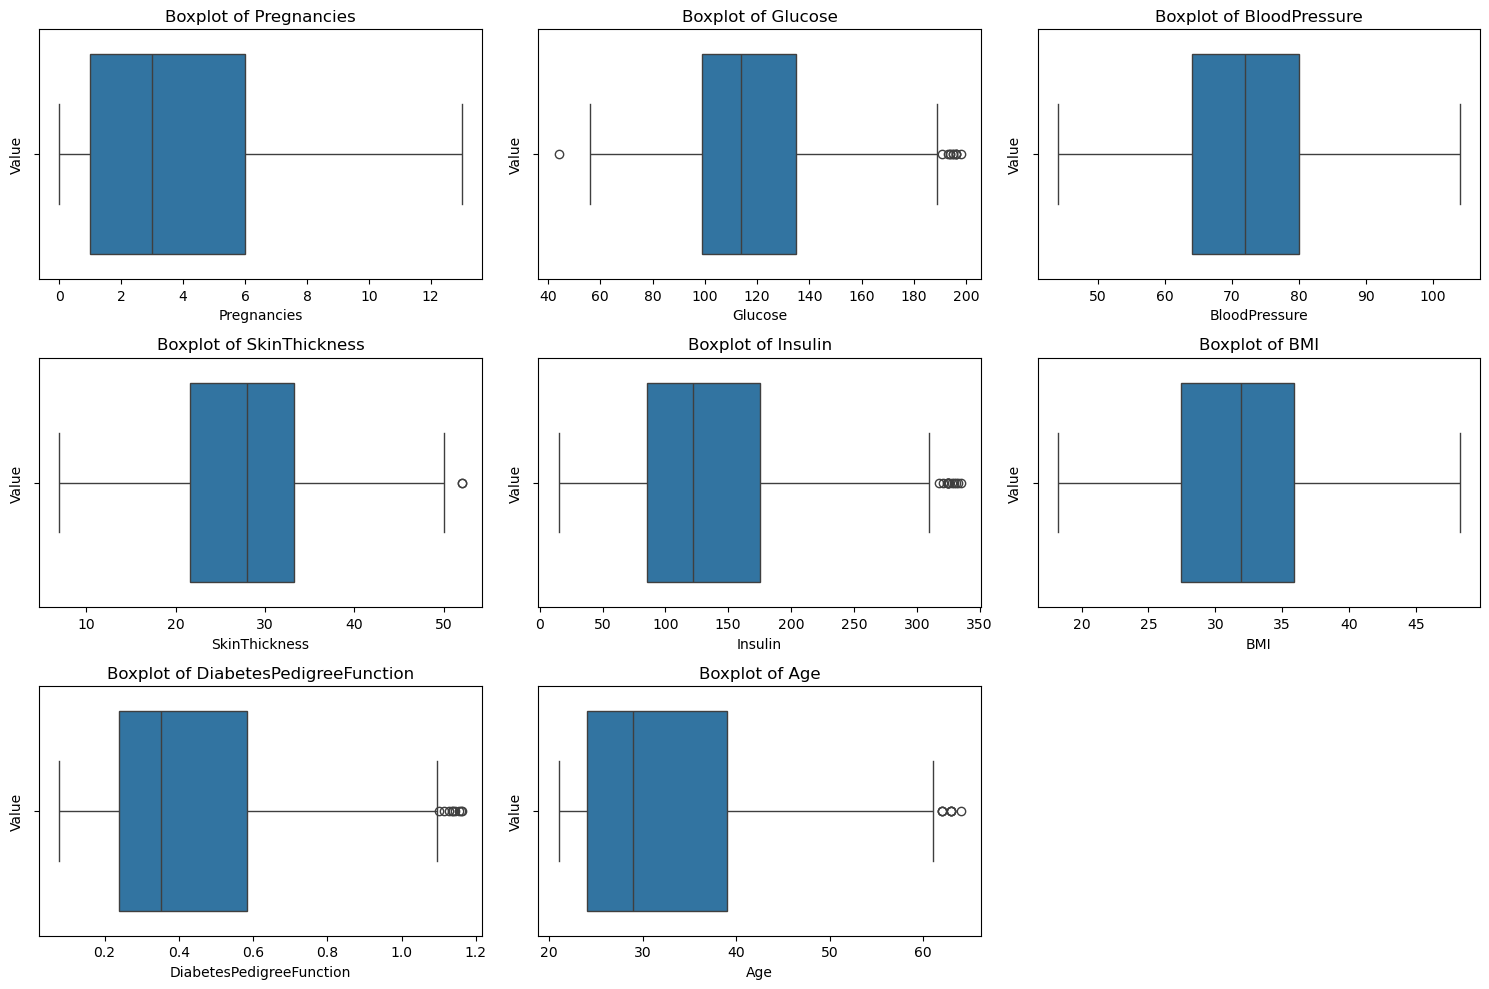

In [31]:
plot_boxplots(column_names_for_box_plots, clean_df_two)

In [32]:
clean_df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     665 non-null    int64  
 1   Pregnancies               665 non-null    int64  
 2   Glucose                   665 non-null    float64
 3   BloodPressure             665 non-null    float64
 4   SkinThickness             665 non-null    float64
 5   Insulin                   665 non-null    float64
 6   BMI                       665 non-null    float64
 7   DiabetesPedigreeFunction  665 non-null    float64
 8   Age                       665 non-null    int64  
 9   Outcome                   665 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 52.1 KB


In [33]:
clean_df_two.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,385.878195,3.744361,118.539248,71.821053,27.866767,135.001203,31.857925,0.424159,32.206015,0.317293
std,220.103669,3.222787,28.653937,10.879783,8.798418,67.144319,6.260283,0.245233,10.616591,0.465773
min,0.000000,0.000000,44.000000,44.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,197.000000,1.000000,99.000000,64.000000,21.600000,85.000000,27.400000,0.238000,24.000000,0.000000
50%,389.000000,3.000000,114.000000,72.000000,28.000000,122.000000,31.900000,0.351000,29.000000,0.000000
75%,571.000000,6.000000,135.000000,80.000000,33.200000,175.000000,35.900000,0.583000,39.000000,1.000000
max,767.000000,13.000000,198.000000,104.000000,52.000000,335.000000,48.300000,1.162000,64.000000,1.000000


In [34]:
clean_df_two.to_csv('dataset/diabetes_v2.csv', index=False)